**Prob 1-4: Prob 1-3처럼 정제된 데이터에 Machine Learning을 이용해 감성분석 모델을 
Train 데이터로 훈련시킨 후, Validation 데이터로 성능을 검증하세요. (Confusion Matrix, 
Accuracy 및 F1-Score 계산)**

In [2]:
import pandas as pd
df_training = pd.read_csv('twitter_training.csv')
df_new_t = df_training[~df_training.iloc[:,2].isin(['Neutral', 'Irrelevant'])]

In [3]:
categories_t = df_new_t.iloc[:, 2].tolist()
reviews_t = df_new_t.iloc[:, 3].tolist()
reviews_t = [str(doc) if pd.notna(doc) else '' for doc in reviews_t]
print(set(categories_t))

{'Negative', 'Positive'}


In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

english_stops = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

#리뷰 전처리 함수
def preprocess_reviews(reviews):
    processed_reviews = []
    for review in reviews:
        if isinstance(review, str):  # 리뷰가 문자열인지 
            tokens = tokenizer.tokenize(review.lower())
            filtered_words = [word for word in tokens if word not in english_stops]
            processed_reviews.append(' '.join(filtered_words))
        else:
            processed_reviews.append('') 
    return processed_reviews

# 리뷰 전처리 실행
cleaned_reviews_t = preprocess_reviews(reviews_t)

**validation**

In [5]:
import pandas as pd
df_validation = pd.read_csv('twitter_validation.csv')
df_new_v = df_validation[~df_validation.iloc[:,2].isin(['Neutral', 'Irrelevant'])]

categories_v = df_new_v.iloc[:, 2].tolist()
reviews_v = df_new_v.iloc[:, 3].tolist()
reviews_v = [str(doc) if pd.notna(doc) else '' for doc in reviews_v]
print(set(categories_v))

{'Negative', 'Positive'}


In [6]:
cleaned_reviews_v = preprocess_reviews(reviews_v)

In [12]:
# 1. Naive Bayes
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score

# 1) TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(max_features=5000) 
train_features = tfidf_vectorizer.fit_transform(reviews_t)
test_features = tfidf_vectorizer.transform(reviews_v)

model = MultinomialNB()  
model.fit(train_features, categories_t)

# 예측
train_pred = model.predict(train_features)
val_pred = model.predict(test_features)

# 성능 평가
train_accuracy = accuracy_score(categories_t, train_pred)
val_accuracy = accuracy_score(categories_v, val_pred)
train_f1 = f1_score(categories_t, train_pred, average='weighted')
val_f1 = f1_score(categories_v, val_pred, average='weighted')


print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Training F1 Score: {train_f1}")
print(f"Validation F1 Score: {val_f1}")

Training Accuracy: 0.8681437760818943
Validation Accuracy: 0.8931860036832413
Training F1 Score: 0.8679480167286341
Validation F1 Score: 0.8931925262770564


In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score

# 2) Count Vectorization
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000) 
train_features = count_vectorizer.fit_transform(reviews_t)
test_features = count_vectorizer.transform(reviews_v)

model = MultinomialNB()  
model.fit(train_features, categories_t)

# 예측
train_pred = model.predict(train_features)
val_pred = model.predict(test_features)

# 성능 평가
train_accuracy = accuracy_score(categories_t, train_pred)
val_accuracy = accuracy_score(categories_v, val_pred)
train_f1 = f1_score(categories_t, train_pred, average='weighted')
val_f1 = f1_score(categories_v, val_pred, average='weighted')

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Training F1 Score: {train_f1}")
print(f"Validation F1 Score: {val_f1}")

Training Accuracy: 0.8574689322850622
Validation Accuracy: 0.8931860036832413
Training F1 Score: 0.8573679751328456
Validation F1 Score: 0.893164251077279


In [16]:
# 2. Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 1) TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=20000)
train_features = tfidf_vectorizer.fit_transform(reviews_t)
val_features = tfidf_vectorizer.transform(reviews_v)

model = LogisticRegression(class_weight='balanced')  
model.fit(train_features, categories_t)

# 예측
train_pred = model.predict(train_features)
val_pred = model.predict(val_features)

# 성능 평가
train_accuracy = accuracy_score(categories_t, train_pred)
val_accuracy = accuracy_score(categories_v, val_pred)
train_f1 = f1_score(categories_t, train_pred, average='weighted')
val_f1 = f1_score(categories_v, val_pred, average='weighted')

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Training F1 Score: {train_f1}")
print(f"Validation F1 Score: {val_f1}")

Training Accuracy: 0.9207802088857123
Validation Accuracy: 0.9521178637200737
Training F1 Score: 0.9208086316617424
Validation F1 Score: 0.9521224115484856


In [17]:
# 2) count 벡터화
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)
train_features_count = count_vectorizer.fit_transform(reviews_t)
val_features_count = count_vectorizer.transform(reviews_v)

# 로지스틱 회귀 모델 학습
model_count = LogisticRegression()
model_count.fit(train_features_count, categories_t)

# 예측
train_pred2 = model_count.predict(train_features_count)
val_pred2 = model_count.predict(val_features_count)

# 성능 평가
train_accuracy2 = accuracy_score(categories_t, train_pred2)
val_accuracy2 = accuracy_score(categories_v, val_pred2)
train_f1_2 = f1_score(categories_t, train_pred2, average='weighted')
val_f1_2 = f1_score(categories_v, val_pred2, average='weighted')

print(f"Count Vectorization - Training Accuracy: {train_accuracy2}")
print(f"Count Vectorization - Validation Accuracy: {val_accuracy2}")
print(f"Count Vectorization - Training F1 Score: {train_f1_2}")
print(f"Count Vectorization - Validation F1 Score: {val_f1_2}")

Count Vectorization - Training Accuracy: 0.9103128674521015
Count Vectorization - Validation Accuracy: 0.9484346224677717
Count Vectorization - Training F1 Score: 0.9103467407680478
Count Vectorization - Validation F1 Score: 0.9484300727873867


In [18]:
# 3. SVM(Support Vector Machine)
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# 1) TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000) 
train_features = tfidf_vectorizer.fit_transform(reviews_t)
test_features = tfidf_vectorizer.transform(reviews_v)

model = SVC() 
model.fit(train_features, categories_t)

# 예측
train_pred = model.predict(train_features)
val_pred = model.predict(test_features)

# 성능 평가
train_accuracy = accuracy_score(categories_t, train_pred)
val_accuracy = accuracy_score(categories_v, val_pred)
train_f1 = f1_score(categories_t, train_pred, average='weighted')
val_f1 = f1_score(categories_v, val_pred, average='weighted')


print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Training F1 Score: {train_f1}")
print(f"Validation F1 Score: {val_f1}")

Training Accuracy: 0.968574919881032
Validation Accuracy: 0.9852670349907919
Training F1 Score: 0.9685871331620551
Validation F1 Score: 0.9852657350821103


In [19]:
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score

# 2) Count Vectorization
count_vectorizer = CountVectorizer(stop_words='english', max_features=5000)  
train_features = count_vectorizer.fit_transform(reviews_t)
test_features = count_vectorizer.transform(reviews_v)


model = SVC() 
model.fit(train_features, categories_t)

# 예측
train_pred = model.predict(train_features)
val_pred = model.predict(test_features)

# 성능 평가
train_accuracy = accuracy_score(categories_t, train_pred)
val_accuracy = accuracy_score(categories_v, val_pred)
train_f1 = f1_score(categories_t, train_pred, average='weighted')
val_f1 = f1_score(categories_v, val_pred, average='weighted')

print(f"Training Accuracy: {train_accuracy}")
print(f"Validation Accuracy: {val_accuracy}")
print(f"Training F1 Score: {train_f1}")
print(f"Validation F1 Score: {val_f1}")

Training Accuracy: 0.9501302653724667
Validation Accuracy: 0.9686924493554327
Training F1 Score: 0.9501496740936142
Validation F1 Score: 0.9686935115320863


**결과**

텍스트 분류 성능을 극대화하는 최적의 머신러닝 모델과 벡터화 방법을 찾아보았다. 

이를 위해 Naive Bayes, Logistic Regression, Support Vector Machine (SVM) 세 가지 모델을 사용하여 텍스트 데이터를 분류하고, 벡터화 방법으로는 TF-IDF와 Count Vectorizer를 적용하여 성능을 비교했다.

그 결과 SVM 모델에 TF-IDF 벡터화를 적용했을 때 가장 높은 정확도와 F1 Score가 나타났다.
Training Accuracy: 0.9686,
Validation Accuracy: 0.9853,
Training F1 Score: 0.9686,
Validation F1 Score: 0.9853

**Confusion Martix**

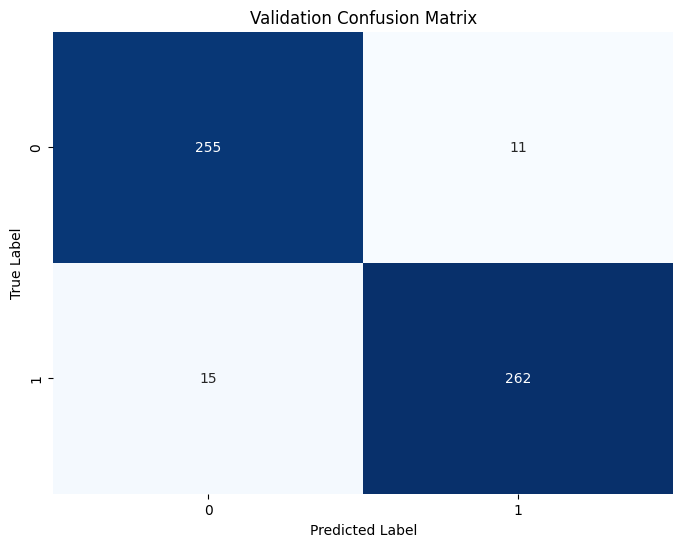

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix 
train_cm = confusion_matrix(categories_t, train_pred)
val_cm = confusion_matrix(categories_v, val_pred)


def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# 검증 데이터 Confusion Matrix
plot_confusion_matrix(val_cm, "Validation Confusion Matrix")
